In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sys
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import *
from scipy import stats
import statsmodels.api as sm

In [9]:
Time1 = pd.read_csv('data2.txt', sep=" ")

In [10]:
Time1

,x
1,0.432428
2,0.810877
3,1.077883
4,0.734030
5,-0.148870
...,...
196,-0.407260
197,-1.177249
198,-1.397347
199,0.755863


In [20]:
#from pandas.tools.plotting import autocorrelation_plot
#autocorrelation_plot(Time1)
#plt.show()

In [21]:
Time1=Time1.astype('float')

Text(0, 0.5, 'X')

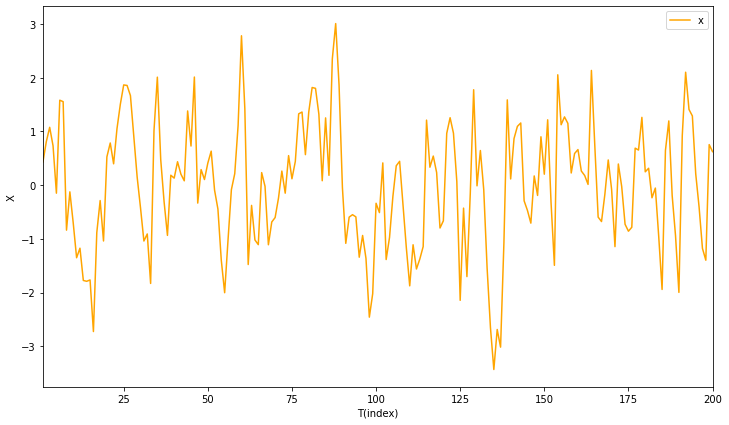

In [53]:
Time1.plot(figsize=(12, 7), color= "orange")
plt.xlabel('T(index)')
plt.ylabel('X')

In [22]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(Time1['x'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.878767
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


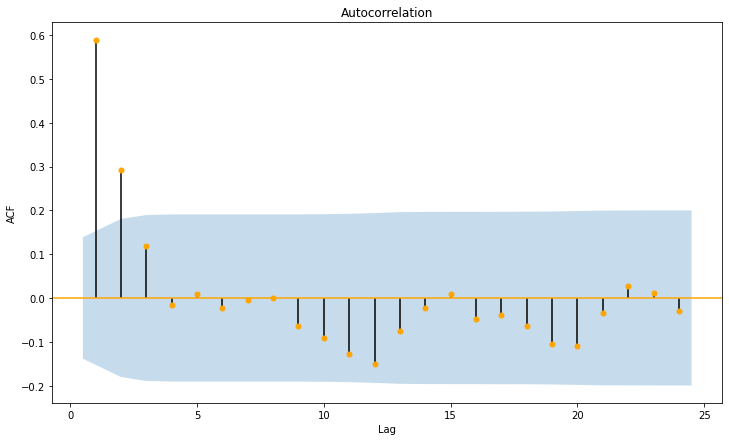

In [60]:
fig, ax = plt.subplots(figsize=(12, 7))
sm.graphics.tsa.plot_acf(Time1['x'].values,ax=ax,zero=False, color= "orange")
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

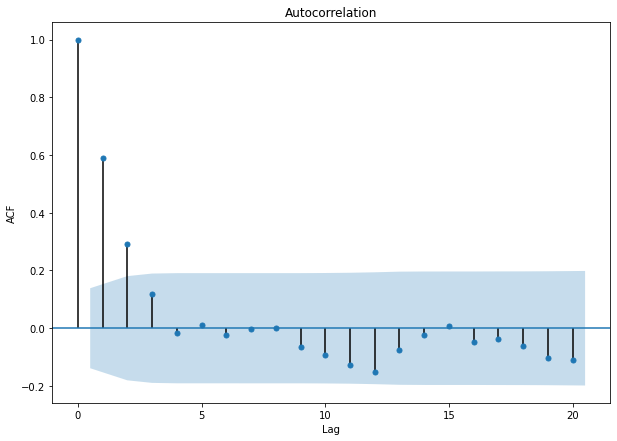

In [61]:
fig, ax = plt.subplots(figsize=(10, 7))
sm.graphics.tsa.plot_acf(Time1['x'].values, lags=20,ax=ax)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.savefig('acf.png',bbox_inches='tight')
plt.show()

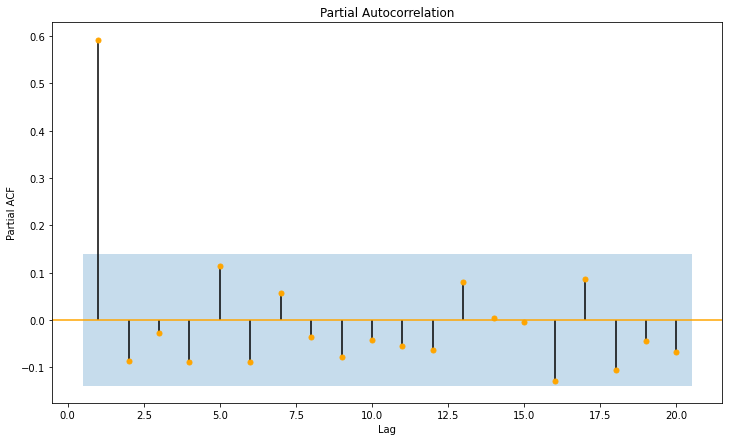

In [63]:
fig, ax = plt.subplots(figsize=(12, 7))
sm.graphics.tsa.plot_pacf(Time1['x'].values,zero=False, lags=20,ax=ax,color= "orange")
plt.xlabel('Lag')
plt.ylabel('Partial ACF')
plt.show()

In [33]:
# Hence the given data represents an AR time series of order 1

In [64]:
from statsmodels.tsa.arima_model import ARIMA

In [65]:
model= ARIMA(Time1, order=(1,0,0))

C:\Users\HRITIK\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  base index (or the model's index if the base index was not given) and


In [66]:
model_fit=model.fit()

In [67]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      x   No. Observations:                  200
Model:                     ARMA(1, 0)   Log Likelihood                -271.618
Method:                       css-mle   S.D. of innovations              0.940
Date:                Fri, 20 Nov 2020   AIC                            549.237
Time:                        22:53:45   BIC                            559.132
Sample:                             0   HQIC                           553.241
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0037      0.160      0.023      0.982      -0.310       0.318
ar.L1.x        0.5882      0.057     10.349      0.000       0.477       0.700
                                    Roots           